In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Amazon Sale Report.csv.zip')
df.sample(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
28664,28664,405-8853520-8989947,04-13-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,654.0,Surajgarh,RAJASTHAN,333029.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
58804,58804,407-1692631-9331533,05-24-22,Shipped,Amazon,Amazon.in,Expedited,JNE3701,JNE3701-KR-XXXL,kurta,...,INR,333.0,Ernakulam,KERALA,683513.0,IN,NaN,False,NaN,False
40042,40042,407-9652359-6439506,04-06-22,Shipped,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-L,kurta,...,INR,399.0,BHIWADI,RAJASTHAN,301019.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
118334,118334,408-1786522-1978746,06-08-22,Shipped,Amazon,Amazon.in,Expedited,JNE3887,JNE3887-KR-L,kurta,...,INR,526.0,KOLKATA,WEST BENGAL,700036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
60666,60666,408-9639407-4676309,05-22-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3800,JNE3800-KR-S,Western Dress,...,INR,771.0,BHUBANESWAR,ODISHA,751016.0,IN,NaN,False,NaN,False


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = df.drop(labels = ['index' , 'Order ID', 'Unnamed: 22', 'ship-postal-code', 'promotion-ids'], axis = 1)

In [6]:
df.isnull().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-country             33
B2B                       0
fulfilled-by          89698
dtype: int64

In [7]:
df=df.fillna(method = 'bfill', axis=0)

In [8]:
df.isnull().sum()

Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city              0
ship-state             0
ship-country           0
B2B                    0
fulfilled-by          83
dtype: int64

In [9]:
df=df.fillna(0)

In [10]:
df.dtypes

Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [11]:
for col in df.columns:
    print("Column:",col, "\n\n", df[col].value_counts(),"\n")

Column: Date 

 05-03-22    2085
05-02-22    2079
05-04-22    2015
04-14-22    1883
04-15-22    1853
            ... 
06-23-22    1090
06-24-22    1028
06-25-22    1026
06-29-22     658
03-31-22     171
Name: Date, Length: 91, dtype: int64 

Column: Status 

 Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64 

Column: Fulfilment 

 Amazon      89698
Merchant    39277
Name: Fulfilment, dtype: int64 

Column: Sales Channel  

 Amazon.in     128851
Non-Amazon       124
Name: Sales Channel , dtype: int64 

Column: 

         Amount  Qty
0        647.62    0
1        406.00    1
2        329.00    1
3        753.33    0
4        574.00    1
...         ...  ...
128970   517.00    1
128971   999.00    1
128972   690.00    1
128973  1199.00    1
128974   696.00    1

[128975 rows x 2 columns]
Amount


<Figure size 800x500 with 0 Axes>

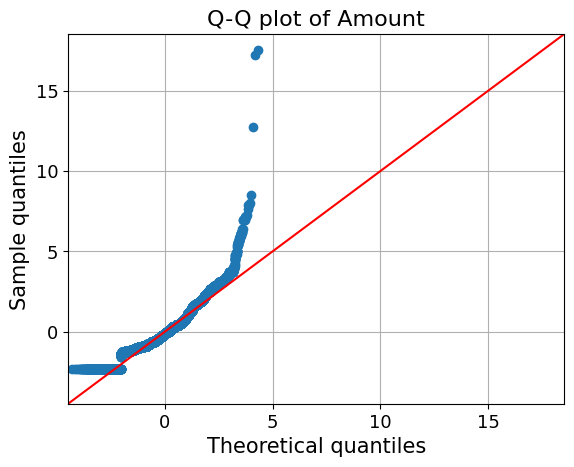

Qty


<Figure size 800x500 with 0 Axes>

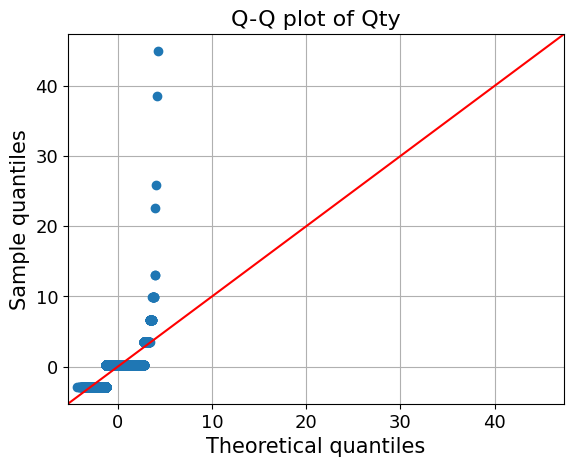

In [12]:
#checking the distribution of  variables
from statsmodels.graphics.gofplots import qqplot
data_norm=df[['Amount','Qty']]
print(data_norm)
for c in data_norm.columns[:]:
    print(c)
    plt.figure(figsize=(8,5))
    fig=qqplot(data_norm[c],line='45',fit='True')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles",fontsize=15)
    plt.ylabel("Sample quantiles",fontsize=15)
    plt.title("Q-Q plot of {}".format(c),fontsize=16)
    plt.grid(True)
    plt.show()

Text(0.5, 1.0, 'Scaled data')

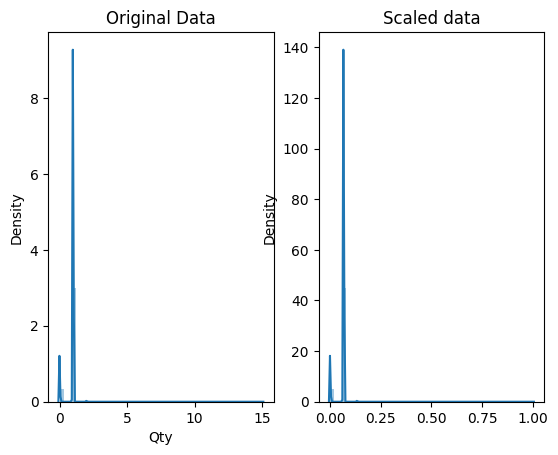

In [13]:
# scaling, Scaling just changes the range of  data.
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(df['Qty'], columns = [0])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['Qty'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

Text(0.5, 1.0, 'Scaled data')

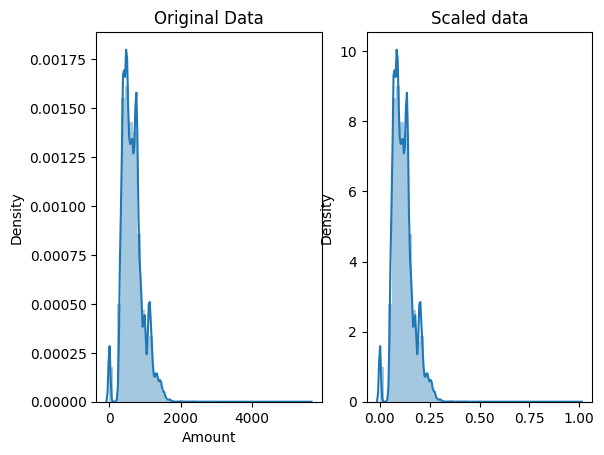

In [14]:
scaled_data = minmax_scaling(df['Amount'], columns = [0])
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df['Amount'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In [15]:
df[['Qty','Amount']].groupby(df['Fulfilment']).mean()

,Qty,Amount
Fulfilment,,
Amazon,0.937446,649.273232
Merchant,0.829035,646.859903


In [16]:
df['Amount'].groupby(df['Fulfilment']).sum()

Fulfilment
Amazon      58238510.40
Merchant    25406716.41
Name: Amount, dtype: float64

In [17]:
df['Amount'].groupby(df['Category']).count()

Category
Blouse             926
Bottom             440
Dupatta              3
Ethnic Dress      1159
Saree              164
Set              50284
Top              10622
Western Dress    15500
kurta            49877
Name: Amount, dtype: int64

In [18]:
df['Amount'].groupby(df['Status']).max()

Status
Cancelled                        4235.72
Pending                          1672.00
Pending - Waiting for Pick Up    2326.00
Shipped                          5584.00
Shipped - Damaged                1136.00
Shipped - Delivered to Buyer     5495.00
Shipped - Lost in Transit         999.00
Shipped - Out for Delivery       1399.00
Shipped - Picked Up              1998.00
Shipped - Rejected by Buyer       967.00
Shipped - Returned to Seller     2796.00
Shipped - Returning to Seller    1976.00
Shipping                          999.00
Name: Amount, dtype: float64

In [19]:
# avrage of variables in ship city and ship state
a = df.groupby(['ship-state', 'ship-city'])
a.mean()

Qty      Amount  \
ship-state         ship-city                                                 
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  1.0  999.000000   
                   BAMBOOFLAT                              0.8  720.824000   
                   FERRARGUNJ                              0.9  596.300000   
                   GARACHARMA                              1.0  307.000000   
                   GREAT NICOBAR                           1.0  657.666667   
...                                                        ...         ...   
punjab             phagwara                                1.0  472.000000   
rajasthan          jaipur                                  1.0  439.000000   
                   madanganj-kishangarh  ajmer             1.0  872.000000   
                   sriganganagar                           1.0  885.000000   
rajsthan           Bheem                                   1.0  521.000000   

                                                           B2B  
ship-state         ship-city                                    
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  0.0  
                   BAMBOOFLAT                              0.0  
                   FERRARGUNJ                              0.0  
                   GARACHARMA                              0.0  
                   GREAT NICOBAR                           0.0  
...                                                        ...  
punjab             phagwara                                0.0  
rajasthan          jaipur                                  0.0  
                   madanganj-kishangarh  ajmer             0.0  
                   sriganganagar                           0.0  
rajsthan           Bheem                                   0.0  

[9148 rows x 3 columns]

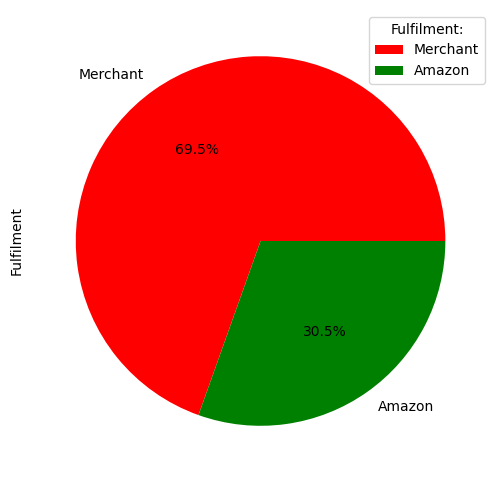

In [20]:
plt.figure(1, figsize=(6,6))
df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "r", "g"),labels = df['Fulfilment'].unique(), shadow = False)
plt.legend(title = "Fulfilment:")
plt.show()

<Axes: xlabel='Courier Status', ylabel='count'>

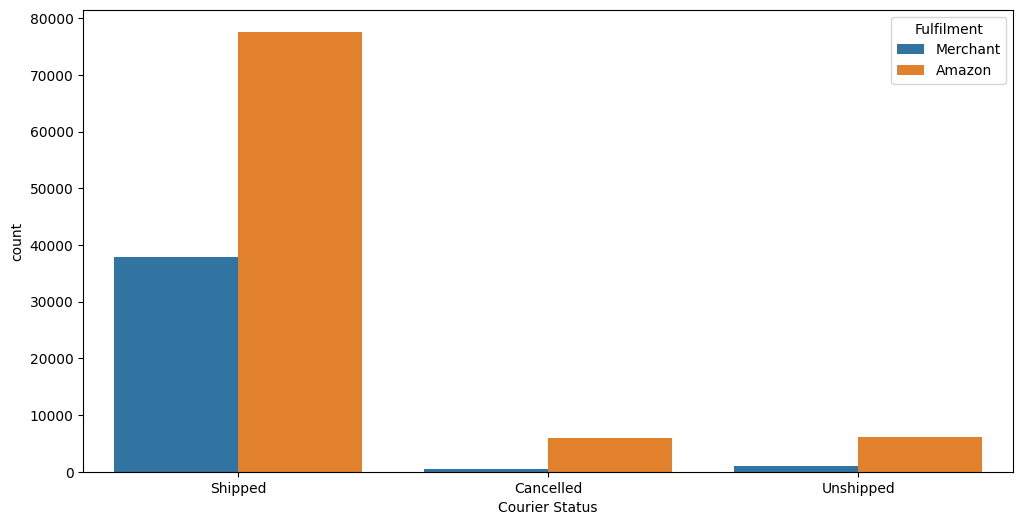

In [21]:
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Courier Status', hue = 'Fulfilment', data = df)

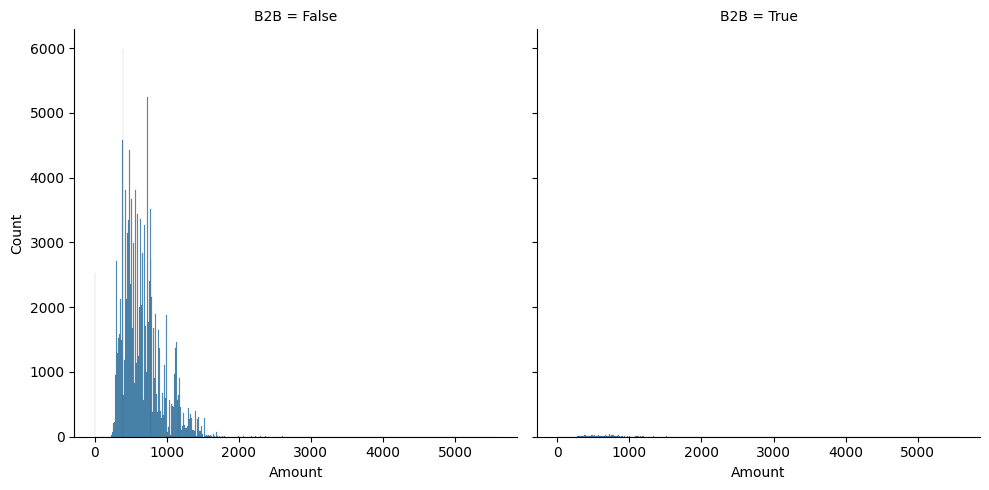

In [22]:
sns.displot(data = df, x = 'Amount', col = 'B2B');

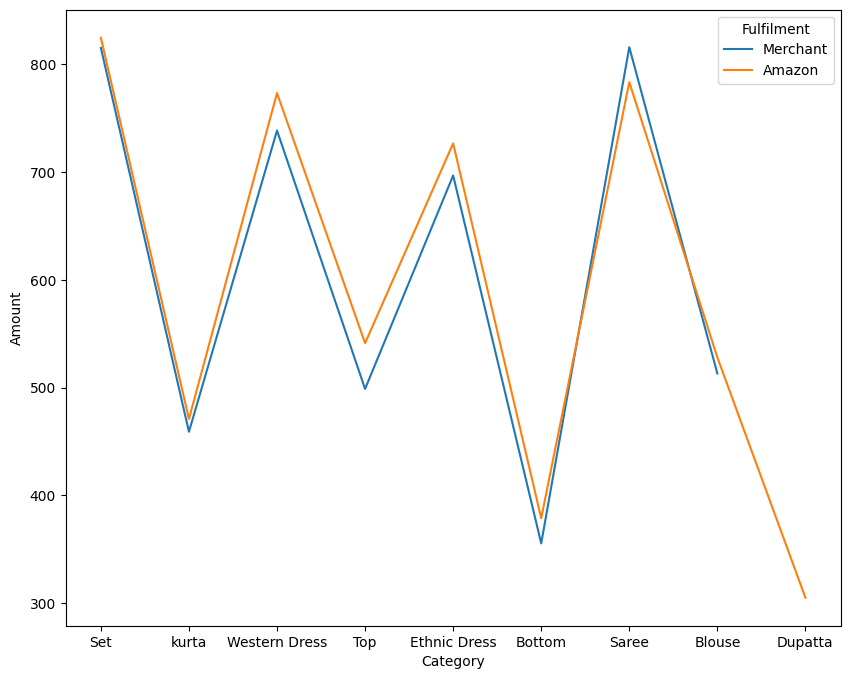

In [23]:
plt.figure(figsize = (10, 8))

sns.lineplot(x = 'Category', y = 'Amount', hue = 'Fulfilment', ci = None, estimator = 'mean', data = df);